## California District Housing Price Prediction Model

This aim of this project is to predict the price of houses in Calfornia districts using data sourced from the Stalib repository. This dataset is based on the data from the 1990 California Census.

The algorithm being used in a general multi regression algorithm. The machine learning method will be a supervised ML system since it will working with labelled dataset. The ML system will also learn through offline Batch learning.

## Source
__________________________________________________________________________________________________________

This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

## Tweaks
___________________________________________________________________________________________________________

The dataset in this directory is almost identical to the original, with two differences:

207 values were randomly removed from the total_bedrooms column, so we can discuss what to do with missing data.
An additional categorical attribute called ocean_proximity was added, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island. This allows discussing what to do with categorical data.
Note that the block groups are called "districts" in the Jupyter notebooks, simply because in some contexts the name "block group" was confusing.

## Data Description
___________________________________________________________________________________________________________

```python
>>> housing.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

>>> housing["ocean_proximity"].value_counts()
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

>>> housing.describe()
          longitude      latitude  housing_median_age   total_rooms  \
count  16513.000000  16513.000000        16513.000000  16513.000000   
mean    -119.575972     35.639693           28.652335   2622.347605   
std        2.002048      2.138279           12.576306   2138.559393   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1442.000000   
50%     -118.510000     34.260000           29.000000   2119.000000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  
count    16355.000000  16513.000000  16513.000000   16513.000000  
mean       534.885112   1419.525465    496.975050       3.875651  
std        412.716467   1115.715084    375.737945       1.905088  
min          2.000000      3.000000      2.000000       0.499900  
25%        295.000000    784.000000    278.000000       2.566800  
50%        433.000000   1164.000000    408.000000       3.541400  
75%        644.000000   1718.000000    602.000000       4.745000  
max       6210.000000  35682.000000   5358.000000      15.000100

```

## Stack and Requirements
________________________________________________________________________________________________________

- Numpy
- Scipy
- Scikit-learn
- Jupyter
- Python3
- Matplotlib
- Pandas

In [1]:
! pip3 show scikit-learn

Name: scikit-learn
Version: 1.0.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /Users/johnphillip/ml/ml_env/lib/python3.8/site-packages
Requires: threadpoolctl, numpy, scipy, joblib
Required-by: 


In [2]:
import sys
sys.path.append('/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages')

In [3]:
import os
import tarfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import scipy as sp

The ```fetch_housing_data``` function ensure that in the case where the data source is updated, the function can always fetch the latest iteration of the data.

In [4]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
# Check the data using the .head() function in Pandas to view the first 5 rows and features of the data
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Using Matplotlib's pyplot library histogram to show the distribution of the values of each feature

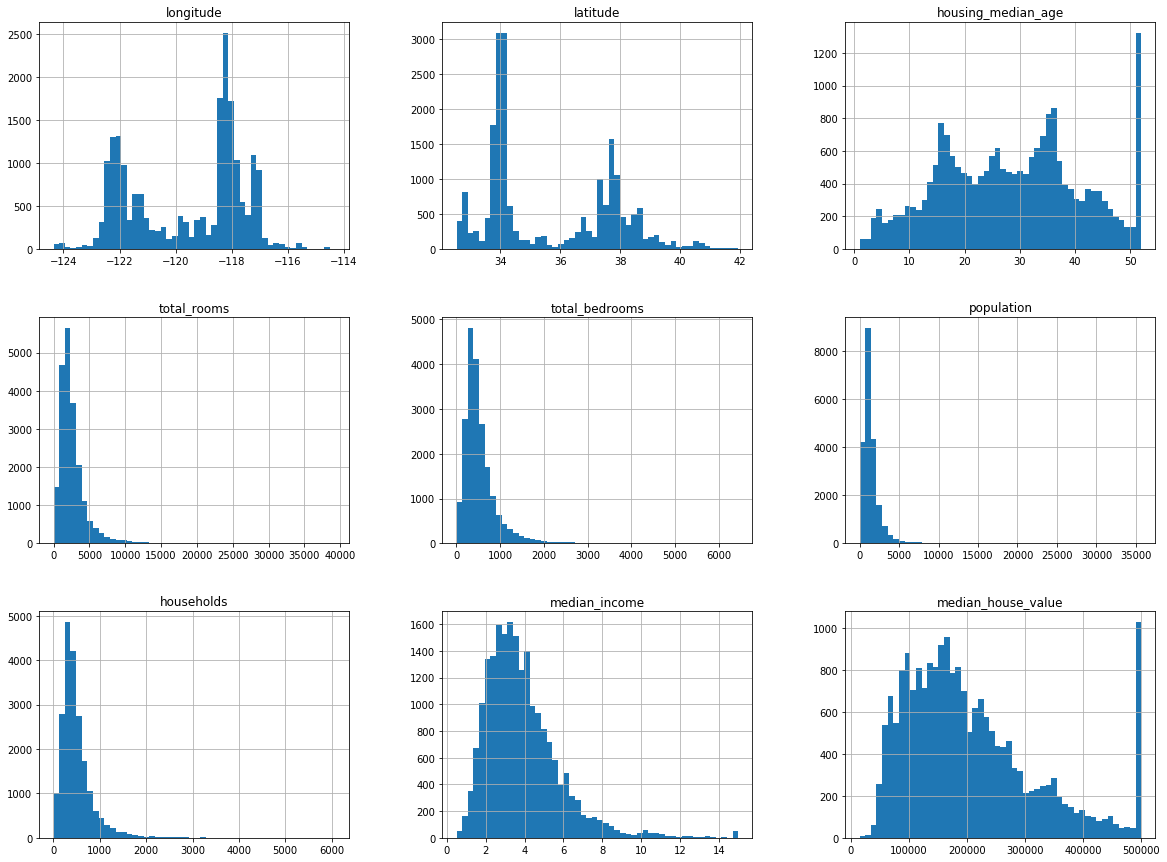

In [9]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

**Split the dataset into a training set and test set. The test set should be selected randomly with the unique identifier or ID. The ratio of the training set to test set is 0.8 to 0.2**

In [10]:
# Create identifier column for the housing data set.
housing_id = housing.reset_index() # Adds index column
# Using the district's latitude and longitude to create a more stable ID
housing_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

**One option in creating/spliting the data set is to make a custom function like the example below**
```python
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
    
def split_train_set_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
```

In [11]:
# Using scikit-learn's train_test_split() function performs the same function as the split_train_set_by_id function
# and has a cleaner code syntax
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

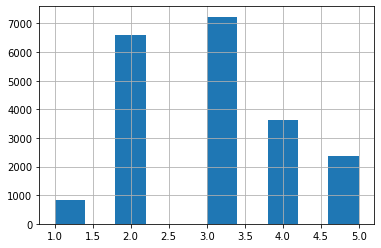

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

In [14]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [15]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [16]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [17]:
# Removing the income category attribute
for set_ in(strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Visualizing Data to gain insights

In [18]:
# A copy of the strat_train_set is to created to allow for exploration of the dataset to ensure mistakes are not
# made on the original dataset
housing_df = strat_train_set.copy()

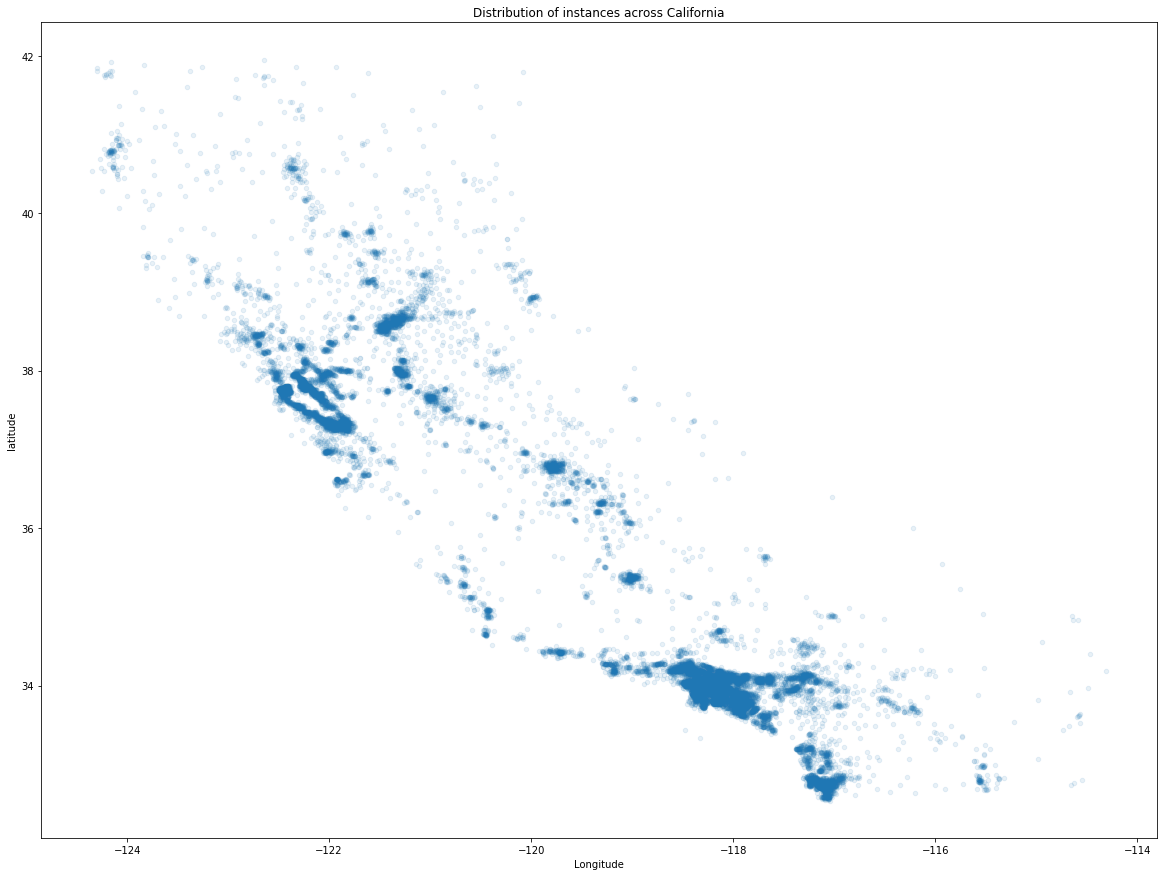

In [19]:
# To have a visualization of the distibution of the population I am working with on the training data, I have decided
# to create a scatter plot with the latitude and longitude of the instances in our data
x = housing_df["longitude"]
y = housing_df["latitude"]

housing_df.plot(kind="scatter", x="longitude", y="latitude", figsize=(20, 15), alpha=0.1)

plt.title("Distribution of instances across California")
plt.xlabel("Longitude")
plt.ylabel("latitude")
plt.show()

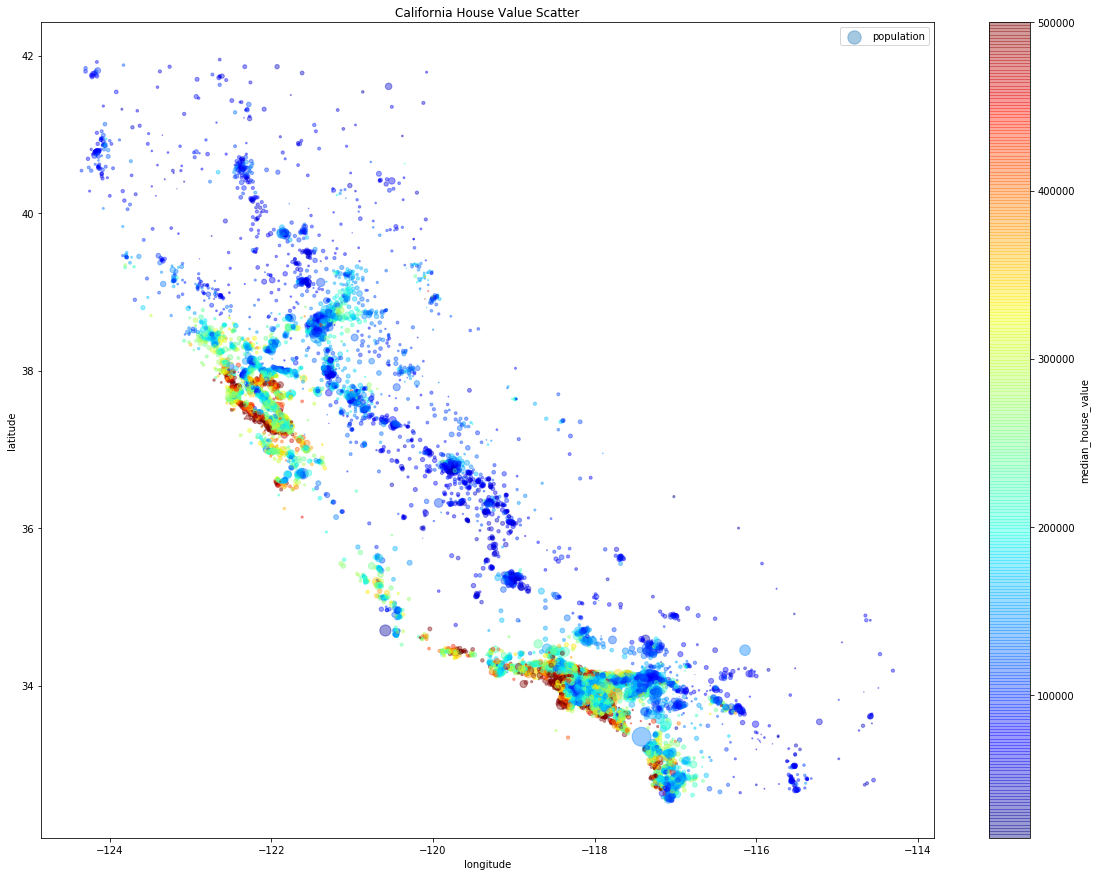

In [20]:
# The chart below displays the home prices in the district using a scatter plot overlayed on a map.
housing_df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    figsize=(20, 15),
    alpha=0.4,
    s=housing_df["population"]/100,
    label="population",
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False
)

plt.title("California House Value Scatter")

plt.legend()
plt.savefig("California_house_value_scatter")

In [21]:
# To view the correlations between attributes, use the standard correlation coefficient AKA Pearson's correlation (r)
corr_matrix = housing_df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [22]:
# Since the aim of the project is to predict the prices of houses in the California districts, a key step to begin 
# selecting our features to feed the model is to view the correlation of all other attributes to the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Pearson's r coefficient ranges from 1 to -1. Coefficients ranging from 0.4 to 1 indicates a positive correlation between two attributes. While coefficients ranging from -0.4 to -1 indcates a negative correlation between two attributes. And 0.3 to 0 to -0.3 shows a low weak linear correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1b2aaebb0>,
      dtype=object)

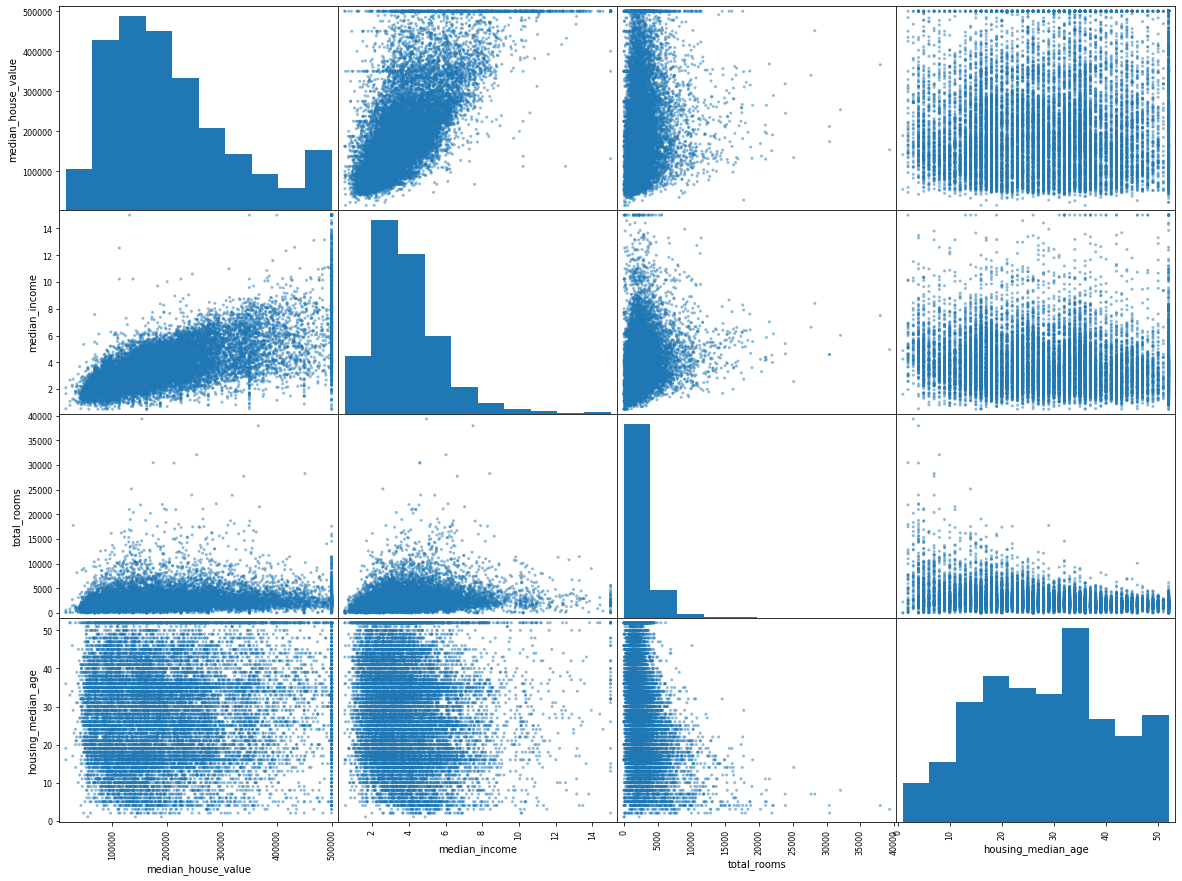

In [23]:
# To visualize correlation seen above
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_df[attributes], figsize=(20, 15))

In the following block of code, a attributes have been created from the combination of other attributes to make more meaningful features.

In [24]:
housing_df["rooms_per_household"] = housing_df["total_rooms"]/housing_df["households"]
housing_df["bedrooms_per_room"] = housing_df["total_bedrooms"]/housing_df["total_rooms"]
housing_df["population_per_household"] = housing_df["population"]/housing_df["households"]

In [25]:
corr_matrix = housing_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

### Wrangling the Data for the Machine learning Algorithms
__________________________________________________________________________________________________________

In [26]:
# Create a new dataframe copying the strat training dataset.
housing_ml = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [27]:
missing_values = housing_ml.isnull()
missing_values.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,False,False,False,False,False,False,False,False,False
15502,False,False,False,False,False,False,False,False,False
2908,False,False,False,False,False,False,False,False,False
14053,False,False,False,False,False,False,False,False,False
20496,False,False,False,False,False,False,False,False,False
1481,False,False,False,False,False,False,False,False,False
18125,False,False,False,False,False,False,False,False,False
5830,False,False,False,False,False,False,False,False,False
17989,False,False,False,False,False,False,False,False,False
4861,False,False,False,False,False,False,False,False,False


In [28]:
# Creates a list of all columns and prints the name of each column and a boolean indicating the number of empty rows in each attribute
for column in missing_values.columns.values.tolist():
    print(f"{column}\n{missing_values[column].value_counts()}\n")

longitude
False    16512
Name: longitude, dtype: int64

latitude
False    16512
Name: latitude, dtype: int64

housing_median_age
False    16512
Name: housing_median_age, dtype: int64

total_rooms
False    16512
Name: total_rooms, dtype: int64

total_bedrooms
False    16354
True       158
Name: total_bedrooms, dtype: int64

population
False    16512
Name: population, dtype: int64

households
False    16512
Name: households, dtype: int64

median_income
False    16512
Name: median_income, dtype: int64

ocean_proximity
False    16512
Name: ocean_proximity, dtype: int64



The attribute `total_bedrooms` has 158 missing values. The missing values will be filled in by the median room numbers

```python
housing_median = housing_ml["total_bedrooms"].median()
housing_ml["total_bedrooms"].fillna(housing_median, inplace=True)
housing_ml["total_bedrooms"].isnull().value_counts()
```

In [29]:
# Scikit-Learn also has a function to handle missing values called `SimpleImputer`. The code below shows how to use the function**


from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")


# Becuase the `SimpleImputer` median instance only computes numeric attributes, one has to drop any non-numeric atttribute(s) from the dataframe. In our case, this means dropping the `ocean_proximity` which is a text attribute.


housing_mean = housing_ml.drop("ocean_proximity", axis=1)  # Create a copy of the training data w/out ocean_proximity attribute


# Then proceed to fit the imputer instance on the training data using the `fit()` method.

imputer.fit(housing_mean)


# The function will compute the mean of each attribute and save it in its `statistics_` instance variable. 
print(imputer.statistics_)


# In the case where there is a need to compensate/replace missing values in the attributes, it is better to apply the imputer to all numerical attributes before the system goes live.

print(housing_mean.median().values)


# Then one can use the 'trained' imputer to transform the training set by replacing the missing values with the learned median. The result is a NumPy array containing the transformed features.


med = imputer.transform(housing_mean)


# To put it back into a main dataframe:

housing_tr = pd.DataFrame(med, columns=housing_mean.columns, index=housing_mean.index)


[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [30]:
housing_mean["total_bedrooms"].isnull().value_counts()

False    16354
True       158
Name: total_bedrooms, dtype: int64

### Handling Text and Categorical Attributes

In our dataframe, we have one text/categorical attribute, `ocean_proximity`. There are a couple ways to handle text data attributes, Binning and Encoding.

In [31]:
housing_cat = housing_ml[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [32]:
# Due to due most ML algorithms preferring to work with numnerical value for computation, encoding the values in 
# the ocean_proximity attribute using Scikit's OrdinalEncoder class will for us to change text to numbers.

from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
housing_cat_encoded = ord_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [33]:
# To get the list of categories, use the categories_ instance
print(ord_encoder.categories_) # Lists the unique values in a 1D array.

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


The Ordinal encoder encodes the catogories between 0 and 4. While this may be fine for cases where the categories are ordered such as "bad", "average", "good", and "excellent", it is not suitable in the case of `ocean_proximity`. To fix this, it is better to create a binary attribute per category: one attribute equal to 1 when the category is `<1H OCEAN` and 0 otherwise, the same applies to other attributes. This is known as **_One-hot encoding_**, this is because the value 1 is assigned to only one attribute when True (hot) and 0 (cold) when it isn't. The new attributes are often referred to as _dummy attributes_.

To implement a one-hot encoder, I use scikit-learn's `OneHotEncoder` class.

In [34]:
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()
housing_cat_1hot = hot_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [35]:
print(hot_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


## Custom Transformers

Scikit-Learn allows for the creation of custom Base classes. The creation of this class allows for the inheritance of Scikit-Learn methods like `fit()`, `transform()`, and `fit_transform`. This class will allow for me to add combined attributes and allow for automatic hyperparameter tuning.

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing_ml.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, x, y=None):  # x is the dataframe being passed in.
        return self  # nothing else to do.
    
    def transform(self, x, y=None):
        rooms_per_household = x[:, rooms_ix] / x[:, households_ix]
        population_per_household = x[:, population_ix] / x[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = x[:, bedrooms_ix] / x[:, rooms_ix]
            return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]
        else: 
            return np.c_[x, rooms_per_household, population_per_household]
        
attribute_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attribute_adder.transform(housing_ml.values)

In [37]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing_ml.columns)+["rooms_per_household", "population_per_household"],
    index=housing_ml.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241



### Transformation Pipeline and Feature Scaling

In [38]:
# First we must standardize the values across the attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_mean)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [39]:
from sklearn.compose import ColumnTransformer

num_attributes = list(housing_mean)
cat_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attributes),
])

housing_prepared = full_pipeline.fit_transform(housing_ml)

In [40]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

## Selecting and Training a Model
______________________________________________________________________________________________________________

As stated earlier the goal of the model is to be able to predict the value of a house factoring other features, the appropriate model for the task is a Linear Regression model.

In [41]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [42]:
# Testing the full preprocessing pipeline on a few instances on the training set
test_train_data = housing_ml.iloc[:5]
test_train_labels = housing_labels.iloc[:5]
test_train_prepared = full_pipeline.transform(test_train_data)
print("Predictions", linear_reg.predict(test_train_prepared))
print("Labels", list(test_train_labels))

Predictions [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [43]:
# Our predictions are way off from the actual values
from sklearn.metrics import mean_squared_error

housing_predictions = linear_reg.predict(housing_prepared)
linear_mse = mean_squared_error(housing_labels, housing_predictions)  # the MSE does not have the same dimension as the predictor y or the error,
# hence the Root MSE is used in place of the MSE for evaluating the model
linear_rmse = np.sqrt(linear_mse)
linear_rmse

68627.87390018745

From the Root Mean Squared Error, the is evidence of the model underfitting the training data. In most of the districts the median_housing_value ranges from 120k to 265K, hence a prediction error of 68K is not satisfactory.

To remedy this issue, a more powerful model needs to be used, and/or better features to feed into the model. Since the current model is not regularized it rules out the latter option

In [44]:
# Testing a DecisionTreeRegressor, as this is a more powerful model capable of finding complex nonlinear relationships in the data.
from sklearn.tree import DecisionTreeRegressor

dectree_reg = DecisionTreeRegressor(random_state=42)
dectree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [45]:
housing_predictions = dectree_reg.predict(housing_prepared)
dectree_mse = mean_squared_error(housing_labels, housing_predictions)  # the MSE does not have the same dimension as the predictor y or the error,
# hence the Root MSE is used in place of the MSE for evaluating the model
dectree_rmse = np.sqrt(dectree_mse)
dectree_rmse

0.0

## Evaluation Using Cross-Validation

To evaluate the Decision Tree model, it is best to divide the training data into smaller subsets and also set aside a _validation set_. The goal is to train the model against the smaller training set and evaluate them against the validation set. 

Using Scikit-learn's _K-fold cross validation feature_ to randomly split the training set into 10 distinct subsets called _folds_, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation everytime and training on the other 9 folds. The result is an array containing the 10 evaluation scores

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dectree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
dectree_rmse_scores = np.sqrt(-scores)

In [47]:
def display_scores(scores):
    """Displays the scores, mean, and STD from the decision tree cross-validation"""
    print(f"Scores: {scores} \n Mean: {scores.mean()} \n Standard Deviation: {scores.std()}")

display_scores(dectree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998] 
 Mean: 71629.89009727491 
 Standard Deviation: 2914.035468468928


The scores from the decision tree aren't satisfactory either, and show evidence of overfitting.

In [48]:
# Computing the same scores using regular Linear regresssion model to confirm the hypothesis that the decision tree
# scores shows evidence of overfitting.
linear_scores = cross_val_score(linear_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956] 
 Mean: 69104.07998247063 
 Standard Deviation: 2880.3282098180694


From the results of the linear regression cv, it proves that the decision tree regression was worse off than the linear model. Trying `RandomForestRegressor`

In [49]:
from sklearn.ensemble import RandomForestRegressor
randforest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
randforest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(random_state=42)

In [50]:
housing_predictions = randforest_reg.predict(housing_prepared)
randforest_mse = mean_squared_error(housing_labels, housing_predictions)
randforest_rmse = np.sqrt(randforest_mse)
randforest_rmse

18650.698705770003

In [51]:
randforest_scores = cross_val_score(randforest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
randforest_rmse_scores = np.sqrt(-randforest_scores)
display_scores(randforest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609] 
 Mean: 50435.58092066179 
 Standard Deviation: 2203.3381412764606


In [52]:
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     71629.890097
std       3071.663088
min      68960.045444
25%      69602.930320
50%      70525.140962
75%      72753.038693
max      79094.741237
dtype: float64

In [53]:
pd.Series(np.sqrt(-linear_scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

In [54]:
pd.Series(np.sqrt(-randforest_scores)).describe()

count       10.000000
mean     50435.580921
std       2322.522327
min      47210.512698
25%      48682.893887
50%      50812.405036
75%      51872.228024
max      54055.908946
dtype: float64

In [55]:
from sklearn.svm import SVR

svr_reg = SVR(kernel = "linear")
svr_reg.fit(housing_prepared, housing_labels)

housing_predictions = svr_reg.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, housing_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

111095.06635291968

In [56]:
svr_scores = cross_val_score(svr_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Scores: [110518.40356474 112956.5486846  106998.56227015 113590.97575445
 107782.52294955 116063.7781669  113279.08892636 111836.81295967
 113168.96643781 111945.40954593] 
 Mean: 111814.1069260169 
 Standard Deviation: 2600.8402690892553


In [57]:
rbf_reg = SVR(kernel = "rbf")
rbf_reg.fit(housing_prepared, housing_labels)

housing_predictions = rbf_reg.predict(housing_prepared)
rbf_mse = mean_squared_error(housing_labels, housing_predictions)
rbf_rmse = np.sqrt(rbf_mse)
rbf_rmse

118578.69234925653

In [58]:
rbf_scores = cross_val_score(rbf_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=20)
rbf_rmse_scores = np.sqrt(-rbf_scores)
display_scores(rbf_rmse_scores)

Scores: [113261.99370063 120057.0838514  120383.28135817 119676.59858929
 116151.8985817  111901.22340828 120123.06214118 120480.42854605
 115276.72482886 114201.71297424 119263.12958281 126840.21119485
 117809.82434792 120758.84891645 117700.28561676 119044.90798094
 120265.83983562 120019.94613024 120072.35819528 117672.11728727] 
 Mean: 118548.07385339709 
 Standard Deviation: 3197.4019989809553


## Fine-Tuning The Model

The `GridSearchCV` helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

In [63]:
from sklearn.model_selection import GridSearchCV

grid_param = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # 1st evaluate 3x4=12 combinations of n_estimators and max_features
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]} # Then try 2x3=6 combinations of hyperparameters
]

randforest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    randforest_reg, grid_param, cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
) # The grid search will explore 18 combiantions of RandomForestRegressor hyperparameter values, and train the model
# 5 times since (cv=5). This means there would be 90 rounds of training 18x5

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid_search.best_params_ # To get the best combination of parameters

{'max_features': 8, 'n_estimators': 30}

In [65]:
grid_search.best_estimator_ # To get the best combination of estimators

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [66]:
# To evaluate the scores of the grid search cross-validation
cv_scores = grid_search.cv_results_
for mean_score, params in zip(cv_scores["mean_test_score"], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [67]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051893,0.008338,0.002659,0.000366,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.137229,0.005550,0.006751,0.000391,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.394947,0.002980,0.019542,0.001401,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.068013,0.002235,0.002252,0.000121,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.216217,0.001587,0.006639,0.000386,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,0.651578,0.006225,0.018693,0.000610,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.088244,0.001362,0.002342,0.000153,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.295177,0.002657,0.006698,0.000347,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,0.899075,0.004660,0.018271,0.000108,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.116837,0.002260,0.002245,0.000063,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


### Randomized Search Cross-Validation

`GridSearchCV` is fine for exploring data with relatively few hyperparameter combinations, but when the hyperparameter search space is large, it is preferable to use Scikit's `RandomizedSearchCV`. The added advantage of `RandomizedSearchCV` is the added control over the computing budget to allocate to hyperparameter search.

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rand_params = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

randforest_reg = RandomForestRegressor(random_state=42)

rand_search = RandomizedSearchCV(randforest_reg, param_distributions=rand_params,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rand_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc1b27058b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc1b2920280>},
                   random_state=42, scoring='neg_mean_squared_error')

In [69]:
rand_search.best_params_ # To get the best combination of parameters

{'max_features': 7, 'n_estimators': 180}

In [71]:
rand_search.best_estimator_ # To get the best combination of estimators

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [72]:
# To evaluate the scores of the randomized  search cross-validation
cv_scores = rand_search.cv_results_
for mean_score, params in zip(cv_scores["mean_test_score"], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [73]:
pd.DataFrame(rand_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.481615,0.297886,0.130002,0.004642,7,180,"{'max_features': 7, 'n_estimators': 180}",-2.399428e+09,-2.335777e+09,-2.313461e+09,-2.476625e+09,-2.537379e+09,-2.412534e+09,8.434791e+07,1
1,0.392380,0.005885,0.009863,0.000365,5,15,"{'max_features': 5, 'n_estimators': 15}",-2.597812e+09,-2.590195e+09,-2.528533e+09,-2.769539e+09,-2.749759e+09,-2.647168e+09,9.513750e+07,9
2,1.313741,0.132843,0.054948,0.012398,3,72,"{'max_features': 3, 'n_estimators': 72}",-2.569955e+09,-2.512528e+09,-2.438188e+09,-2.656741e+09,-2.671254e+09,-2.569733e+09,8.769636e+07,7
3,0.737075,0.098259,0.018908,0.004096,5,21,"{'max_features': 5, 'n_estimators': 21}",-2.583962e+09,-2.515286e+09,-2.474528e+09,-2.649628e+09,-2.671474e+09,-2.578976e+09,7.554893e+07,8
4,4.377787,0.097162,0.088860,0.002784,7,122,"{'max_features': 7, 'n_estimators': 122}",-2.403611e+09,-2.347924e+09,-2.328235e+09,-2.466494e+09,-2.538690e+09,-2.416991e+09,7.757318e+07,2
5,1.316055,0.006206,0.051335,0.001991,3,75,"{'max_features': 3, 'n_estimators': 75}",-2.570132e+09,-2.508518e+09,-2.437703e+09,-2.653315e+09,-2.660383e+09,-2.566010e+09,8.522149e+07,6
6,1.555468,0.021299,0.060185,0.001504,3,88,"{'max_features': 3, 'n_estimators': 88}",-2.554075e+09,-2.501453e+09,-2.419114e+09,-2.640202e+09,-2.643405e+09,-2.551650e+09,8.526641e+07,5
7,2.651533,0.008256,0.069827,0.003272,5,100,"{'max_features': 5, 'n_estimators': 100}",-2.476178e+09,-2.358022e+09,-2.353633e+09,-2.518094e+09,-2.555806e+09,-2.452346e+09,8.274789e+07,3
8,2.632115,0.020340,0.106942,0.002083,3,150,"{'max_features': 3, 'n_estimators': 150}",-2.553841e+09,-2.457321e+09,-2.421557e+09,-2.600262e+09,-2.618930e+09,-2.530382e+09,7.804472e+07,4
9,0.055775,0.003643,0.001658,0.000070,5,2,"{'max_features': 5, 'n_estimators': 2}",-4.023932e+09,-3.942094e+09,-4.289511e+09,-4.516468e+09,-4.461698e+09,-4.246741e+09,2.294524e+08,10


### Support Vector Machine Regressor

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid= [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]}, # gamma is ignored for Linear kernel
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   5.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.3s
[CV] END .............................C=100.0, kernel=linear; total time=   5.3s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [96]:
neg_mse = grid_search.best_score_
rmse = np.sqrt(-neg_mse)
rmse # The output 70286.618 performs worse RandomForestRegressor

70286.61835383571

In [97]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

In [98]:
# Replacing GridSearchCV with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# expon() is an exponential continuous random variable.
# reciprocal() is the reciprocal distribution, also known as the log-uniform distribution, is a continuous probability distribution.

param_spec = {
    'kernel': ['linear', 'rbf'], # gamma is ignored when kernel is Linear
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1.0),
}

svm_reg = SVR()
rand_search = RandomizedSearchCV(svm_reg, param_distributions=param_spec, n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rand_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.4s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.2s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.2s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.2s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.6s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.8s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.6s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc1b2bbf370>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc1b2af57c0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [101]:
rand_search.best_params_  #Notice that RandomizedSearchCV tends to find better params in the same amount of time.

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [102]:
neg_mean = rand_search.best_score_
rmse = np.sqrt(-neg_mean)
rmse  # 54751.69009488048, this is much closer to the RandomForestRegressor() model used earlier

54751.69009488048

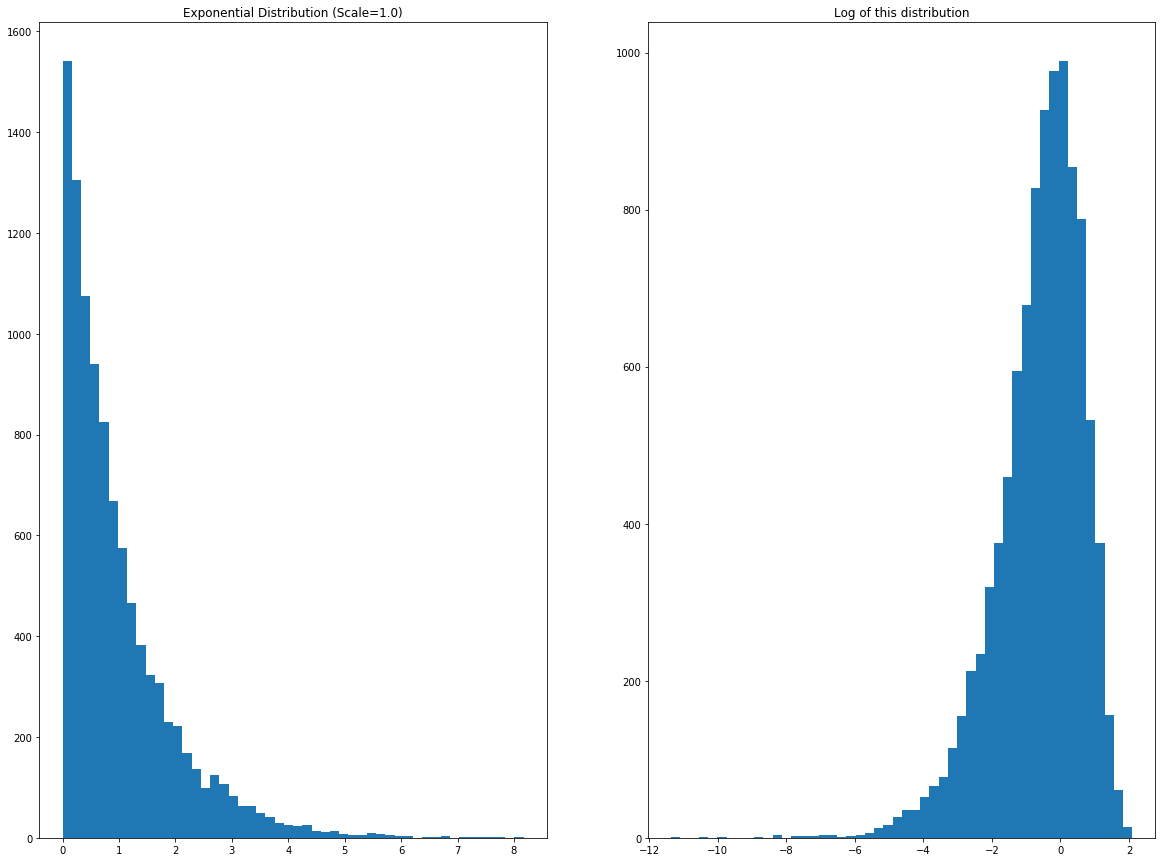

In [104]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(20, 15))
plt.subplot(121)
plt.title('Exponential Distribution (Scale=1.0)')
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for C looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

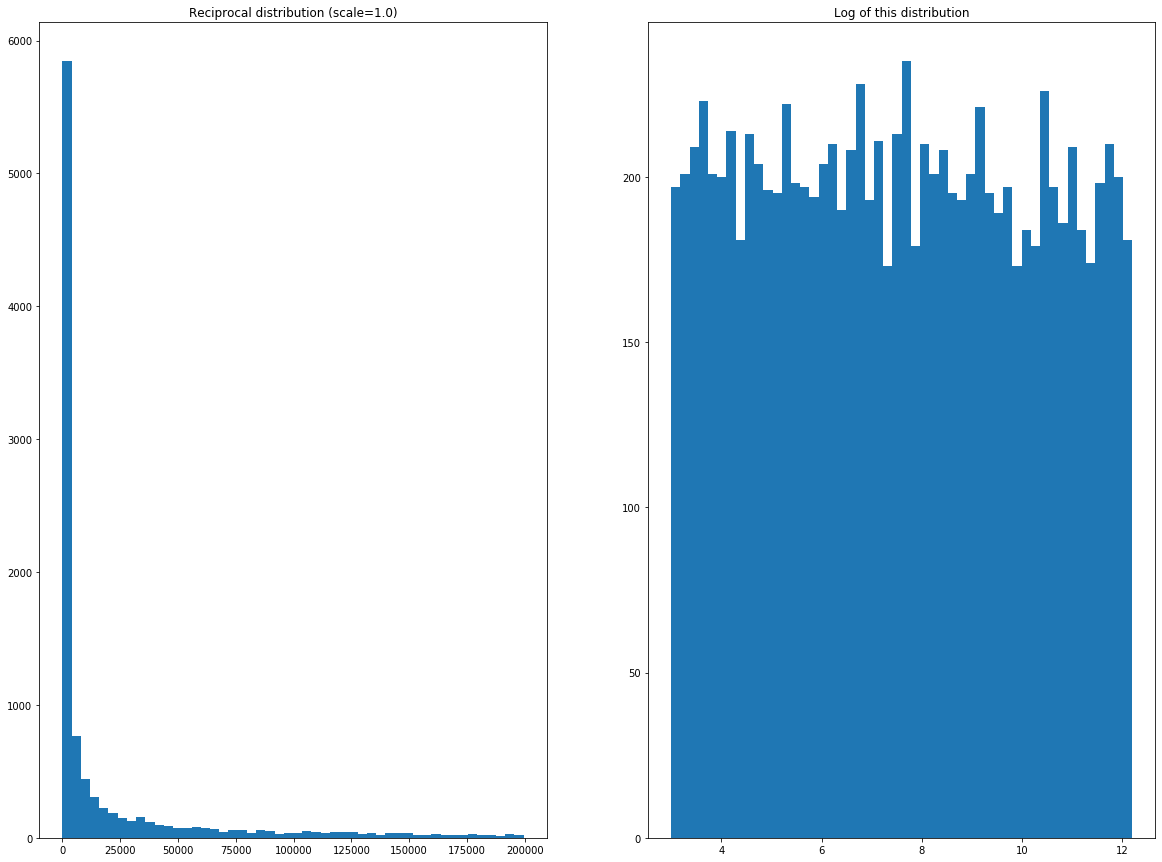

In [105]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(20, 15))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

### Analyzing the best models and Their Errors

In [74]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [77]:
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'population_per_household'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_household'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

### Evaluating the System on the Test Set

In [78]:
final_model = grid_search.best_estimator_ # Stores the best estimators from the Grid Search CV in the variable

x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)

final_prediction = final_model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

final_rmse

47873.26095812988

To estimate the generalization error using a 95% confidence interval

In [80]:
from scipy import stats

confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2
np.sqrt(stats.t.interval(
    confidence, len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale = stats.sem(squared_errors)
))

array([45893.36082829, 49774.46796717])

Z-Scores can also be an alt estimation of generalization errors

In [83]:
m = len(squared_errors)
mean = squared_errors.mean()

z_score = stats.norm.ppf((1 + confidence) / 2)
z_margin = z_score * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - z_margin), np.sqrt(mean + z_margin)

(45893.9540110131, 49773.921030650374)

### Full Pipeline with Preparing and Prediction

In [90]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing_ml, housing_labels)
full_pipeline_with_predictor.predict(test_train_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

In [109]:
# Adding Transformer to the preparation pipeline to select only the most important attributes
from sklearn.base import BaseEstimator, TransformerMixin


def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    """Initialize variables"""
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
        
    def fit(self, x, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    
    def transform(self, x):
        return x[:, self.feature_indices_]
    


In [110]:
k = 5 # The number of top features that should be kept.

In [119]:
top_k_feature_indices = indices_of_top_k(feature_importance, k) # stores the indices of the top k features
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [120]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income',
       'population_per_household', 'INLAND'], dtype='<U24')

In [121]:
sorted(zip(feature_importance, attributes), reverse=True)[:k]

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'population_per_household'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude')]

In [122]:
prep_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importance, k))
])

In [123]:
housing_prepared_top_k_features = prep_and_feature_selection_pipeline.fit_transform(housing_ml)

In [124]:
housing_prepared_top_k_features[0:5]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ],
       [ 1.22173797, -1.35147437, -0.86592882, -0.10680295,  0.        ],
       [ 0.43743108, -0.63581817,  0.32575178,  0.00610923,  0.        ]])

In [125]:
housing_prepared[0:5, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ],
       [ 1.22173797, -1.35147437, -0.86592882, -0.10680295,  0.        ],
       [ 0.43743108, -0.63581817,  0.32575178,  0.00610923,  0.        ]])

A single pipeline that does the full data preparation plus the final prediction

In [131]:
prep_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importance, k)),
    ('svm_reg', SVR(**rand_search.best_params_))
])

In [132]:
prep_select_and_predict_pipeline.fit(housing_ml, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [135]:
# To test the full pipeline of some data instances
some_data = housing_ml.iloc[:5]
some_labels = housing_labels.iloc[:5]

print(f"Predictions: {prep_select_and_predict_pipeline.predict(some_data)}")
print(f"Labels: {list(some_labels)}")

Predictions: [ 83384.49158095 299407.90439234  92272.03345144 150173.16199041
 224160.55042379]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


### Automatically exploring preparation options using GridSearchCV

In [139]:
full_pipeline.named_transformers_["cat"].handle_unknown='ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importance) + 1))
}]

grid_search_prep = GridSearchCV(prep_select_and_predict_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing_ml, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   5.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   9.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   8.6s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   5.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.8s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   5.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.6s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   5.6s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   9.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   9.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   9.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   9.0s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   5.6s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   9.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   8.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   9.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   9.0s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   5.8s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   9.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   9.0s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   5.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.5s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.7s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   5.9s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   9.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   9.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   9.0s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   9.2s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   5.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   9.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   9.6s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   6.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   9.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   9.5s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   9.5s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   9.4s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   6.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   9.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   9.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   9.8s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   9.6s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   6.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   9.5s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   9.5s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   9.5s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   9.4s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   6.4s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   9.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   9.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   9.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   9.9s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   6.4s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  10.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   9.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   9.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   9.9s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   6.3s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   9.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   9.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   9.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   9.9s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   6.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  10.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  10.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  10.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  10.2s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   6.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   9.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  10.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  10.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  10.0s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   9.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  10.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  10.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  10.1s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  10.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  10.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  10.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  11.8s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   7.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  10.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  10.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  10.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  10.4s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   7.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  10.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  10.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  10.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  10.7s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   9.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  11.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  11.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  12.0s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  11.6s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   8.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  11.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  12.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  11.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  12.3s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   8.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  12.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  11.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  12.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  12.1s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  11.5s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  14.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  15.1s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  15.1s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  15.7s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  11.1s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  15.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  15.2s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  14.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  15.5s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   9.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  16.1s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  14.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  13.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  15.4s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  15.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  17.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  15.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  18.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  16.5s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  12.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  18.0s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  17.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  18.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  17.1s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  14.9s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  18.1s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  18.9s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  19.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  16.5s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  14.2s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  20.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  19.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  20.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  18.5s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  14.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  18.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  17.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  21.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  19.5s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  17.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  19.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  20.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  20.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  20.4s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  15.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  21.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  21.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  20.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  19.4s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  17.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  21.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  18.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  17.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  21.3s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  19.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  23.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  22.5s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  19.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  19.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  21.8s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  23.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  19.4s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  19.1s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  22.8s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  18.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  22.8s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  22.7s


/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/utils/metaestimator

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  19.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  18.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  22.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=30.0min
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time= 1.1min
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   0.1s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time= 1.7min
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time= 1.6min
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=18.1min
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=23.6min
[CV] 

/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/johnphillip/ml/ml_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = f

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
       

In [140]:
grid_search_prep.best_params_

{'feature_selection__k': 1, 'preparation__num__imputer__strategy': 'mean'}